# Pokemon Data Analytics challenge

datasource: https://www.kaggle.com/rounakbanik/pokemon/data


- **opdracht 1**: kies ten minste 4 relaties die je wilt visualiseren/metrics over wilt berekenen, zoals vraag q1 heronder
    - licht elke vraag toe (waarom deze vraag, mag kort in 2 zinnnen)
    - schrijf uit wat je 'ziet' in de data
    - trek, wanneer mogelijk, een conclusie, of bespreek wat voor iets je extra in beschouwing zou moeten nemen
- **opdracht 2**: Kies een wat grotere vraag die je wilt beantwoorden, bijvoorbeeld:
    - Is it possible to build a classifier to identify legendary Pokemon?
    - Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.
        - wat een dreamteam is mag je zelf verzinnen, je kunt natuurlijk ook voor inspiratie daarover het internet op gaan

eisen van de opdracht:
- schrijf je data pipeline componenten netjes in functies
- probeer generieke data processing 'naar voren' te halen in je data pipeline
- probeer je dataverwerking te scheiden van je plotting waar mogelijk

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/pokemon.csv')

In [6]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [3]:
def filter_columns(dataf):
    keep_columns = [
        "pokedex_number",
        "name",
        "attack",
        "weight_kg",
        "generation",
        "abilities"
    ]
    return dataf[keep_columns]

def filter_rows(dataf):
    return (dataf
            .loc[lambda d: d['generation'] == 1]
           )

def change_dtypes(dataf):
    return dataf

def preprocess_columns(dataf):
    return dataf

In [5]:
clean_df = (df
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(change_dtypes)
            .pipe(preprocess_columns)
           )
clean_df

,pokedex_number,name,attack,weight_kg,generation,abilities
0,1,Bulbasaur,49,6.9,1,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,62,13.0,1,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,100,100.0,1,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,52,8.5,1,"['Blaze', 'Solar Power']"
4,5,Charmeleon,64,19.0,1,"['Blaze', 'Solar Power']"
...,...,...,...,...,...,...
146,147,Dratini,64,3.3,1,"['Shed Skin', 'Marvel Scale']"
147,148,Dragonair,84,16.5,1,"['Shed Skin', 'Marvel Scale']"
148,149,Dragonite,134,210.0,1,"['Inner Focus', 'Multiscale']"
149,150,Mewtwo,150,122.0,1,"['Pressure', 'Unnerve']"


# example question: what is the relation between weight and attack?

- hieronder alleen een stukje code met een voorbeeld voor scheiden van dataverwerking van plotting. mijn analyse op 'wat zie je' ontbreekt

<AxesSubplot:xlabel='weight_kg', ylabel='attack'>

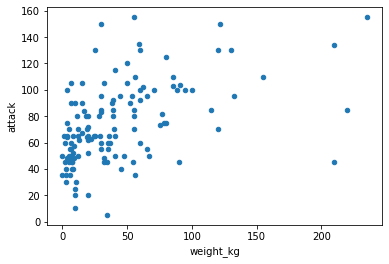

In [27]:
def remove_fatties(dataf, fat=200):
    return dataf.loc[lambda d: d['weight_kg'] < fat]

(clean_df
 .pipe(remove_fatties, fat=300)
 .plot(x='weight_kg',y='attack', kind='scatter')
)